In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import offsetbox
from sklearn import (manifold, datasets, decomposition, ensemble,discriminant_analysis, random_projection)
from time import time

In [2]:
digits_df = pd.read_csv('train.csv')

In [3]:
sample_df = digits_df.sample(10000)

In [14]:
sample_df.groupby('label').count()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
label,,,,,,,,,,,,,,,,,,,,,
0,1017,1017,1017,1017,1017,1017,1017,1017,1017,1017,...,1017,1017,1017,1017,1017,1017,1017,1017,1017,1017
1,1138,1138,1138,1138,1138,1138,1138,1138,1138,1138,...,1138,1138,1138,1138,1138,1138,1138,1138,1138,1138
2,1003,1003,1003,1003,1003,1003,1003,1003,1003,1003,...,1003,1003,1003,1003,1003,1003,1003,1003,1003,1003
3,1030,1030,1030,1030,1030,1030,1030,1030,1030,1030,...,1030,1030,1030,1030,1030,1030,1030,1030,1030,1030
4,946,946,946,946,946,946,946,946,946,946,...,946,946,946,946,946,946,946,946,946,946
5,912,912,912,912,912,912,912,912,912,912,...,912,912,912,912,912,912,912,912,912,912
6,974,974,974,974,974,974,974,974,974,974,...,974,974,974,974,974,974,974,974,974,974
7,1047,1047,1047,1047,1047,1047,1047,1047,1047,1047,...,1047,1047,1047,1047,1047,1047,1047,1047,1047,1047
8,934,934,934,934,934,934,934,934,934,934,...,934,934,934,934,934,934,934,934,934,934


In [4]:
print(len(sample_df))
sample_df.head()

10000


,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
15006,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4252,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
38359,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
13020,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
39006,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [9]:
y = sample_df.ix[:,0].tolist()
X = sample_df.ix[:,1:]
n_samples, n_features = X.shape
n_neighbors = 30


In [10]:
#----------------------------------------------------------------------
# Scale and visualize the embedding vectors
def plot_embedding(X,y, title=None):
    x_min, x_max = np.min(X, 0), np.max(X, 0)
    X = (X - x_min) / (x_max - x_min)

    plt.figure()
    ax = plt.subplot(111)
    for i in range(X.shape[0]):
        plt.text(X[i, 0], X[i, 1], str(y[i]),
                 color=plt.cm.Set1(y[i] / 10.),
                 fontdict={'weight': 'bold', 'size': 9})

    if hasattr(offsetbox, 'AnnotationBbox'):
        # only print thumbnails with matplotlib > 1.0
        shown_images = np.array([[1., 1.]])  # just something big
        for i in range(X.shape[0]):
            dist = np.sum((X[i] - shown_images) ** 2, 1)
            if np.min(dist) < 4e-3:
                # don't show points that are too close
                continue
            shown_images = np.r_[shown_images, [X[i]]]
            #imagebox = offsetbox.AnnotationBbox(
            #    offsetbox.OffsetImage(digits.images[i], cmap=plt.cm.gray_r),
            #    X[i])
            #ax.add_artist(imagebox)
    plt.xticks([]), plt.yticks([])
    if title is not None:
        plt.title(title)

In [11]:
# Locally linear embedding of the digits dataset
print("Computing LLE embedding")
clf = manifold.LocallyLinearEmbedding(n_neighbors, n_components=2,
                                      method='standard')
t0 = time()
X_lle = clf.fit_transform(X)
print("Done. Reconstruction error: %g" % clf.reconstruction_error_)


Computing LLE embedding
Done. Reconstruction error: 5.15593e-05


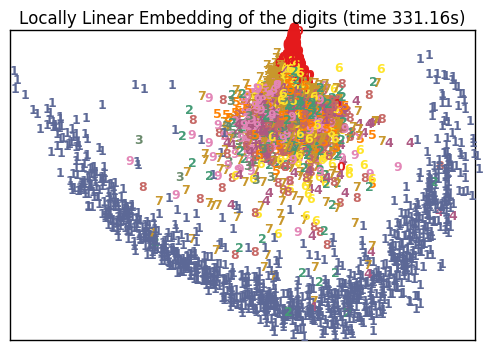

In [13]:
plot_embedding(X_lle,y,
               "Locally Linear Embedding of the digits (time %.2fs)" %
               (time() - t0))
plt.show()